<a href="https://colab.research.google.com/github/kaustubhbhavsar/animals-10-classification/blob/main/image_size_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM: To perform image size analysis.**

In [1]:
# Note: Comment or delete the current code block if dataset is loaded from local disk.
# loading dataset from kaggle
# upload kaggle.json file
! pip install -q kaggle
from google.colab import files
print("Upload 'kaggle.json' file...")
files.upload()

# download the dataset(zipped folder) and unzip it
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download alessiocorrado99/animals10
! unzip animals10.zip

Upload 'kaggle.json' file...


Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot  as plt
from imutils import paths
import imagesize

**Constructing Image Meta Data DataFrame**

In [3]:
# get the list of images
imagePaths = list(paths.list_images("raw-img"))

In [4]:
# get the image size of all the images
image_path_size = {} # dict to store image path and associated image size
for imagePath in imagePaths:
  image_path_size[imagePath] = imagesize.get(imagePath)

print(f'Total images in the dataset(including all classes): {len(image_path_size)}')

Total images in the dataset(including all classes): 26179


In [5]:
# convert the dict to dataframe and compute aspect ratio
image_data_df = pd.DataFrame.from_dict([image_path_size]).T.reset_index().set_axis(['FilePath', 'Size'], axis='columns', inplace=False)
image_data_df[["Width", "Height"]] = pd.DataFrame(image_data_df["Size"].tolist(), index=image_data_df.index)
image_data_df["Aspect Ratio"] = round(image_data_df["Width"] / image_data_df["Height"], 2)

print(f'Describing dataframe: \n{image_data_df.head()}')

Describing dataframe: 
                                            FilePath        Size  Width  \
0  raw-img/farfalla/OIP-40xupskAVNmz4Ql5_cIlbgAAA...  (300, 200)    300   
1  raw-img/farfalla/ea37b90f2bf5083ed1584d05fb1d4...  (640, 428)    640   
2  raw-img/farfalla/ea36b20c29fc003ed1584d05fb1d4...  (640, 388)    640   
3  raw-img/farfalla/OIP--BwCcfYAvrI0U8yYgWplXwHaF...  (300, 237)    300   
4  raw-img/farfalla/OIP-AQWBrOhtWbd2JhxXdwq_xwHaE...  (300, 169)    300   

   Height  Aspect Ratio  
0     200          1.50  
1     428          1.50  
2     388          1.65  
3     237          1.27  
4     169          1.78  


**Visualizing Image Resolution**

Observations:


1.   Cluster of images near 300✖300 and near 700✖700.
2.   Few images have too high resolution.



Text(0, 0.5, 'Height')

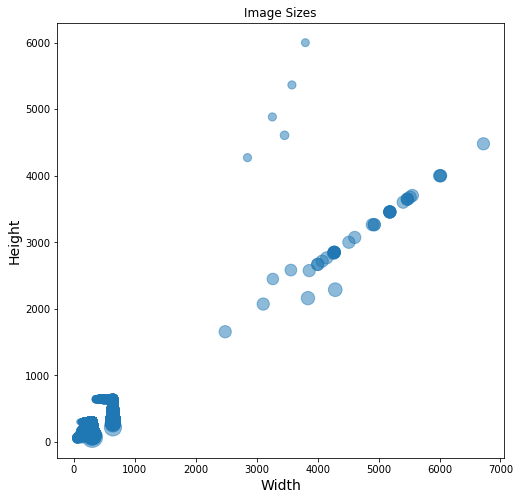

In [6]:
# visualizing image sizes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(image_data_df.Width, image_data_df.Height, 
                    alpha=0.5, s=image_data_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Sizes")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

**Zooming in at 700✖700.**

Observations: 



1.   Cluster of images at around 650✖650.



(0.0, 700.0, 0.0, 700.0)

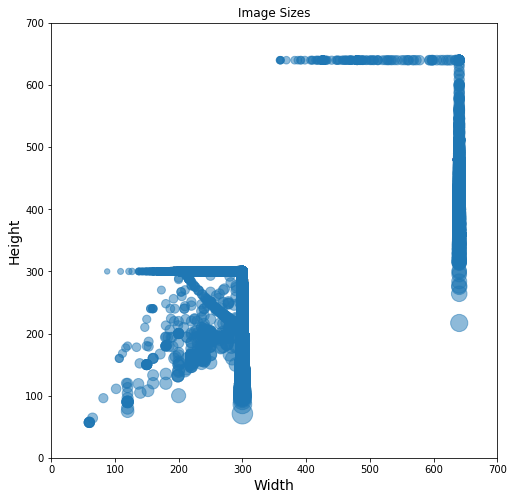

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(image_data_df.Width, image_data_df.Height, 
                    alpha=0.5, s=image_data_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Sizes")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.axis([0, 700, 0, 700]) # zooming at 700*700

**Zooming in at 350✖350.**

Observations: 



1.   Cluster of images at around 200✖250, 200✖300, 300✖300.
2.   Few images with too low resolution.



(0.0, 350.0, 0.0, 350.0)

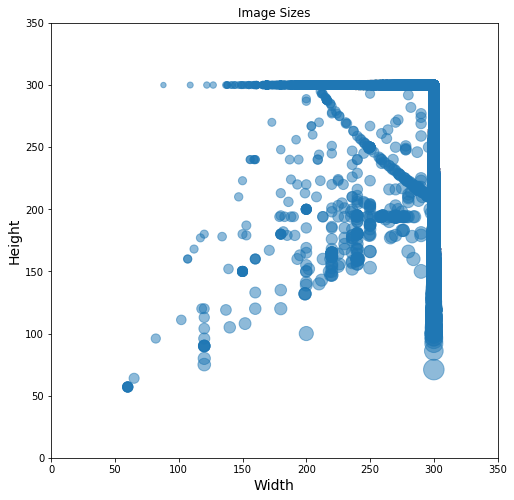

In [8]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(image_data_df.Width, image_data_df.Height, alpha=0.5,
           s=image_data_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Sizes")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.axis([0,350, 0, 350]) # zooming at 350*350

**Conclusion:**

1.   Image size could be chosen around 250✖250, or 300✖300, or 650✖650. One way to get better performance, is to use ***Progressive Resizing***.
  * Train the model using lowest image size (say, 300✖300) and then use the weights of this trained model to train another model with larger input image size (say, 650✖650).
  * Vice versa, i.e., starting from largest image size and then subsequently downscaling image sizes is also possible, which may result in even better performance.

2.   Few images are away from clusters, i.e., having too low or too high resolution. These images could add bias to the model. These images can be kept as it is or can be handled following ways:
  * Upscaling will result in adding zero padding, i.e., no 
information is getting added.
  * Downscaling may result in losing important information.
  * Also, there is choice of identifying such data points using [Lasso Selector](https://matplotlib.org/stable/gallery/widgets/lasso_selector_demo_sgskip.html), and removing them permanently.

Note: Downscaling has proven to give better results compared to upscaling, however, this depends on project to project.
